In [1]:
import tensorflow as tf
from keras import datasets, layers, models
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

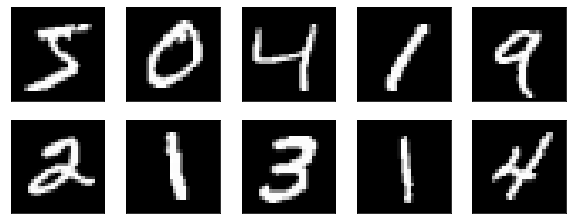

In [3]:
plt.figure(figsize = (10,10))
for i in range(10):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap = 'gray' )
  # plt.xlabel(class_names[train_labels[i][0]])

plt.show()

In [4]:
train_images = train_images.reshape(60000, 28, 28, 1)
test_images = test_images.reshape(10000, 28, 28, 1)

In [5]:
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(60000, 28, 28, 1)
(60000,)
(10000, 28, 28, 1)
(10000,)


In [6]:
model = models.Sequential()
model.add(layers.Conv2D(32, (5,5), activation='relu', input_shape=(28,28,1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (5,5), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dropout(0.1))
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dropout(0.1))
model.add(layers.Dense(10, activation = 'softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 64)          51264     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                65600     
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)               

In [7]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics = ['accuracy'])
history = model.fit(train_images, train_labels, batch_size = 600, epochs=15, 
                    validation_data = (test_images, test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 58s 970us/step - loss: 1.9907 - accuracy: 1.3333e-04 - val_loss: 1.7910 - val_accuracy: 0.0000e+00
Epoch 2/15
60000/60000 [==============================] - 56s 933us/step - loss: 1.6831 - accuracy: 0.0535 - val_loss: 1.5909 - val_accuracy: 0.0999
Epoch 3/15
60000/60000 [==============================] - 59s 977us/step - loss: 1.5916 - accuracy: 0.1009 - val_loss: 1.5797 - val_accuracy: 0.0966
Epoch 4/15
60000/60000 [==============================] - 55s 924us/step - loss: 1.5854 - accuracy: 0.1007 - val_loss: 1.5785 - val_accuracy: 0.0997
Epoch 5/15
60000/60000 [==============================] - 56s 927us/step - loss: 1.5718 - accuracy: 0.1017 - val_loss: 1.4959 - val_accuracy: 0.1008
Epoch 6/15
60000/60000 [==============================] - 55s 918us/step - loss: 1.4926 - accuracy: 0.0993 - val_loss: 1.4792 - val_accuracy: 0.0985
Epoch 7/15
60000/60000 [========================